In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

%matplotlib inline

In [2]:
import pandas as pd
import os

# Specify the directory path where the Excel files are located
directory_path = 'D:\combo_IC50_skew_kurt_data'  # Replace with the actual directory path

# Get a list of Excel files in the specified directory
csv_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Loop through the Excel files and concatenate them
for file in csv_files:
    df = pd.read_csv(file)  # Read each Excel file
    concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

# Now, 'concatenated_df' contains the combined data from all Excel files in the specified directory.

# You can further process or save the concatenated DataFrame as needed.
valid_data = pd.read_csv(r'D:\combo_IC50_skew_kurt_data\validation\chunk_14.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [5]:
X = concatenated_df.drop('Combo IC50', axis = 1)
y = concatenated_df['Combo IC50']
y = pd.DataFrame(y)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 250)

In [53]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.5, l1_ratio=0.4, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)


In [54]:
mse = mean_squared_error(y_test, test_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("Root Mean Squared Error:", rmse)
mae = mean_absolute_error(y_test, test_pred)
print("Mean Absolute Error:", mae)
r2 = r2_score(y_test, test_pred)
print("R-squared:", r2)
evs = explained_variance_score(y_test, test_pred)
print("Explained Variance Score:", evs)

Mean Squared Error: 1.0858867208629737
Root Mean Squared Error: 1.0420588855064639
Mean Absolute Error: 0.8291099697756211
R-squared: 0.9019654838890797
Explained Variance Score: 0.9019695040661371


In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=8)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.89912905 0.90144448 0.90191302 0.90221036 0.90171291 0.90229058
 0.90095884 0.90131376]


In [56]:
X_val = valid_data.drop('Combo IC50', axis = 1)
y_val = valid_data['Combo IC50']

In [57]:
val_pred = model.predict(X_val)

In [58]:
print("*********FOR VALIDATION SET**********")
mse = mean_squared_error(y_val, val_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(y_val, val_pred))
print("Root Mean Squared Error:", rmse)
mae = mean_absolute_error(y_val, val_pred)
print("Mean Absolute Error:", mae)
r2 = r2_score(y_val, val_pred)
print("R-squared:", r2)
evs = explained_variance_score(y_val, val_pred)
print("Explained Variance Score:", evs)

*********FOR VALIDATION SET**********
Mean Squared Error: 1.084810153564356
Root Mean Squared Error: 1.0415421996080407
Mean Absolute Error: 0.8303749767209067
R-squared: 0.9028713857782031
Explained Variance Score: 0.9028713905611169


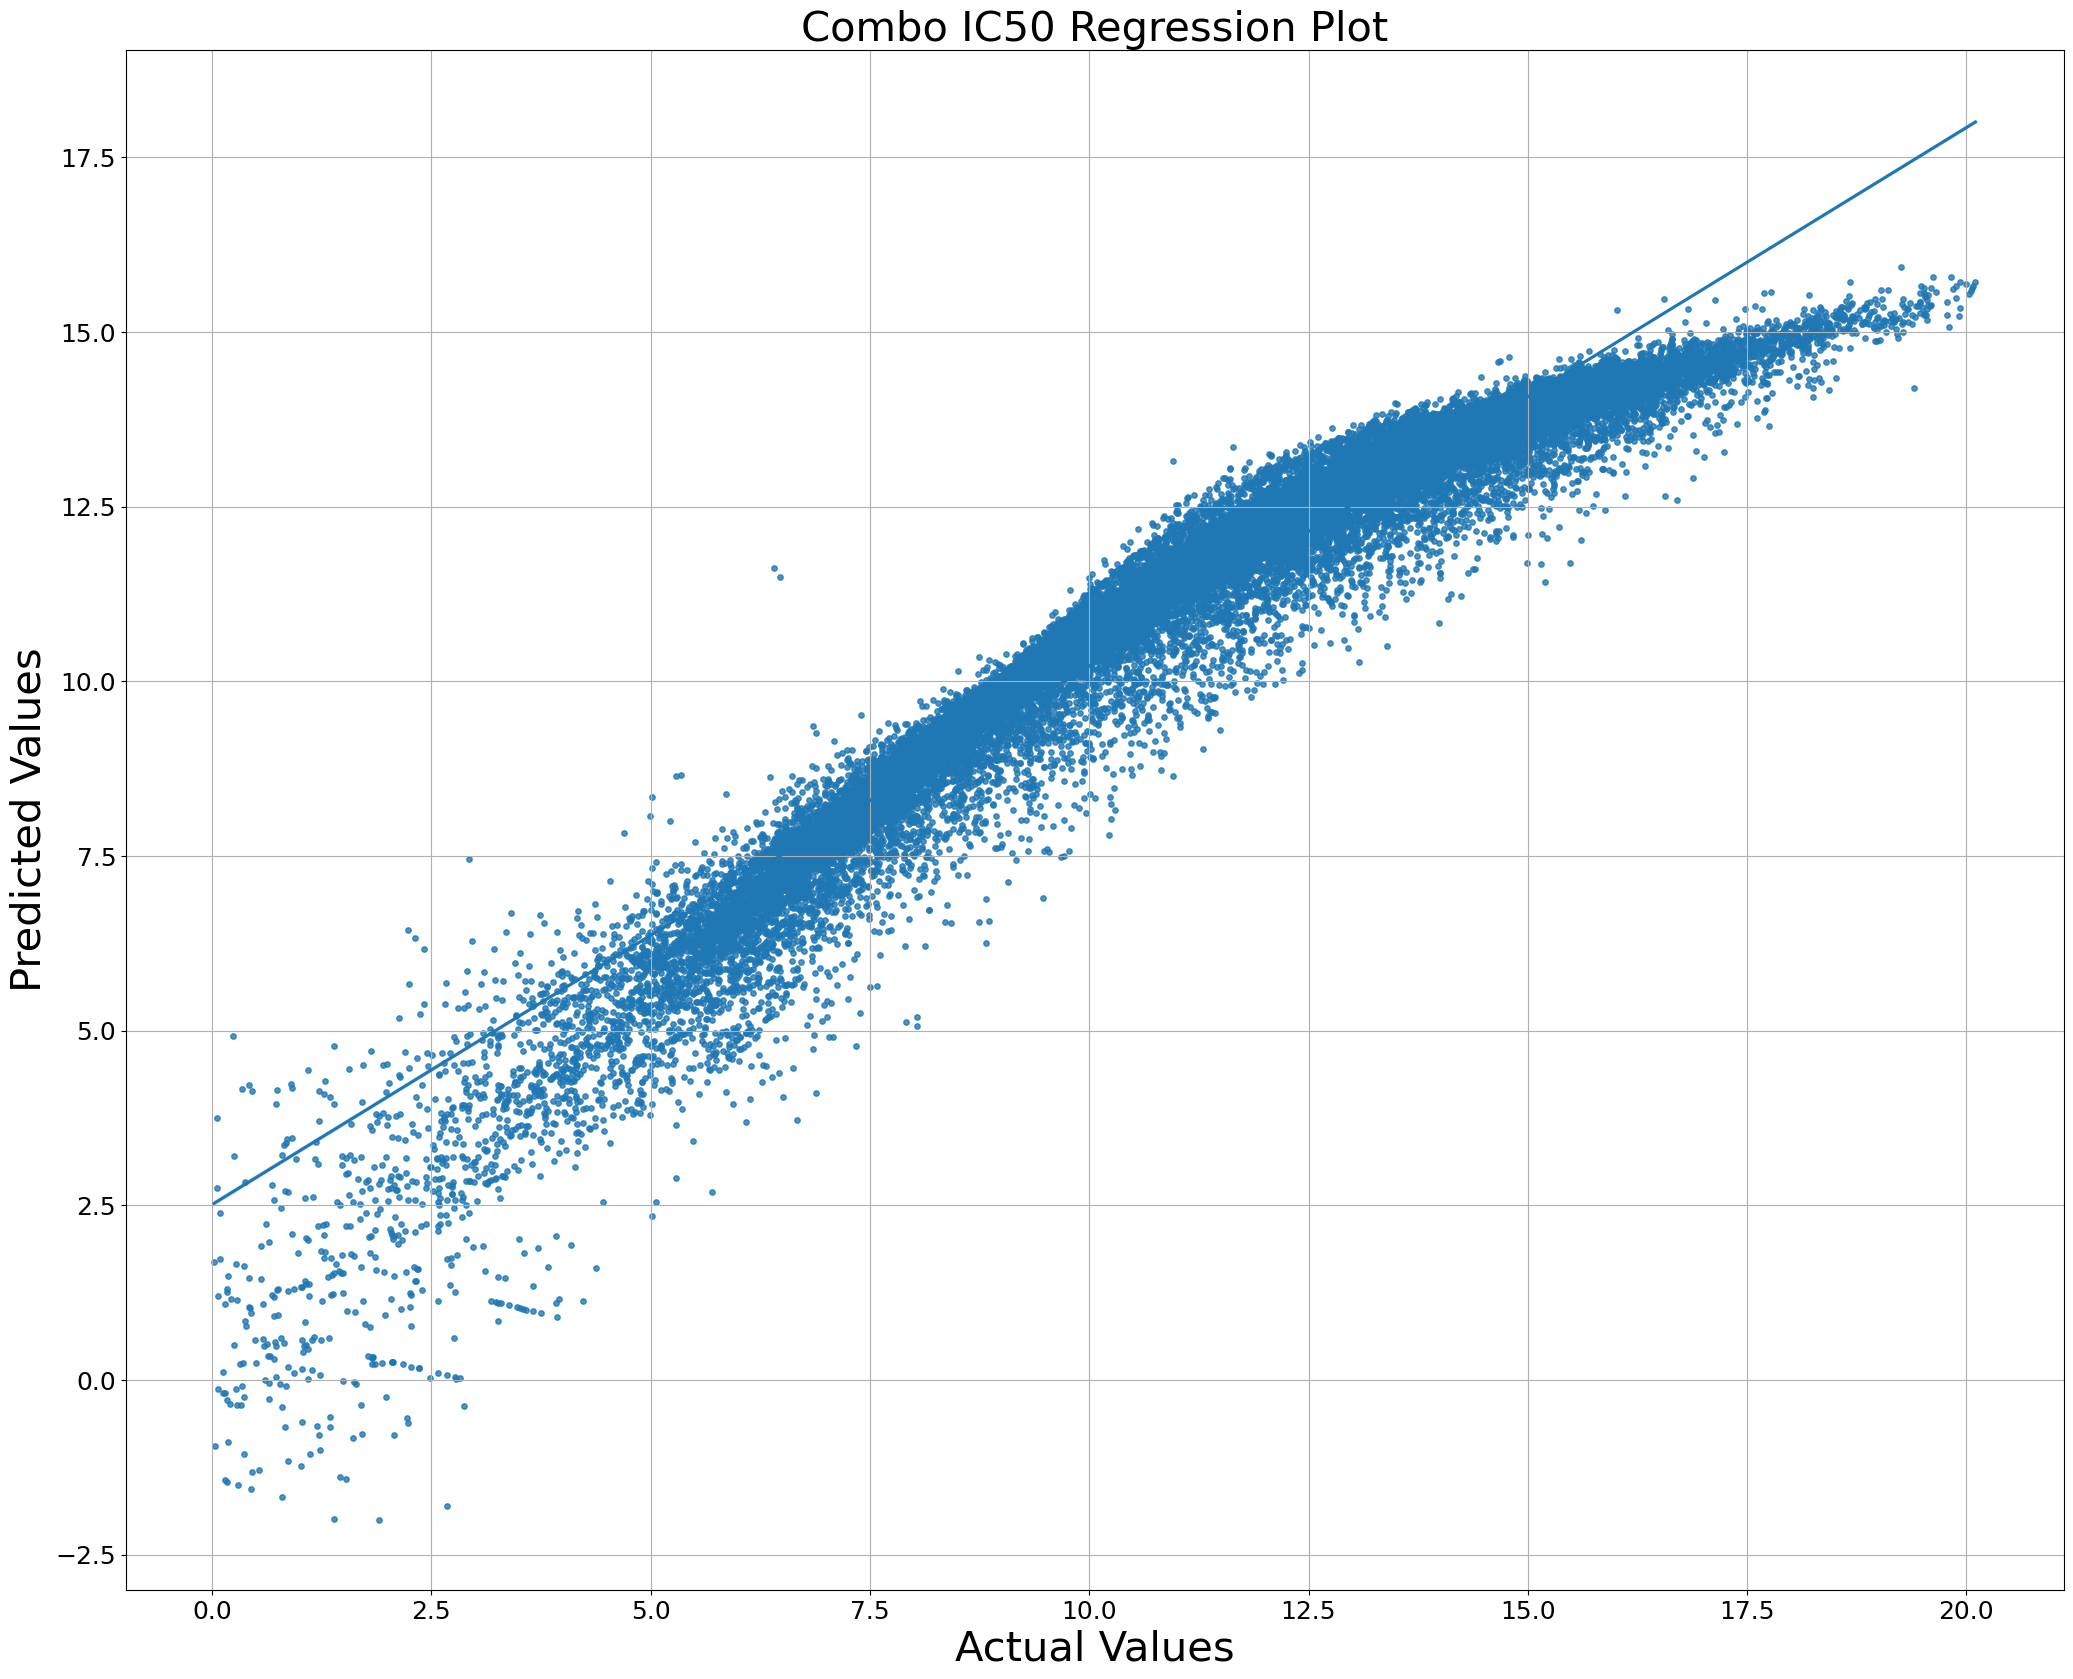

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Create a scatterplot with regression line and confidence interval
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.regplot(x=y_test, y=test_pred, scatter_kws={'s': 15}, ci=95)

# Add labels and a title
plt.xlabel("Actual Values", fontsize=30)
plt.ylabel("Predicted Values", fontsize=30)
plt.title("Combo IC50 Regression Plot", fontsize=30)
plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


35903 35903


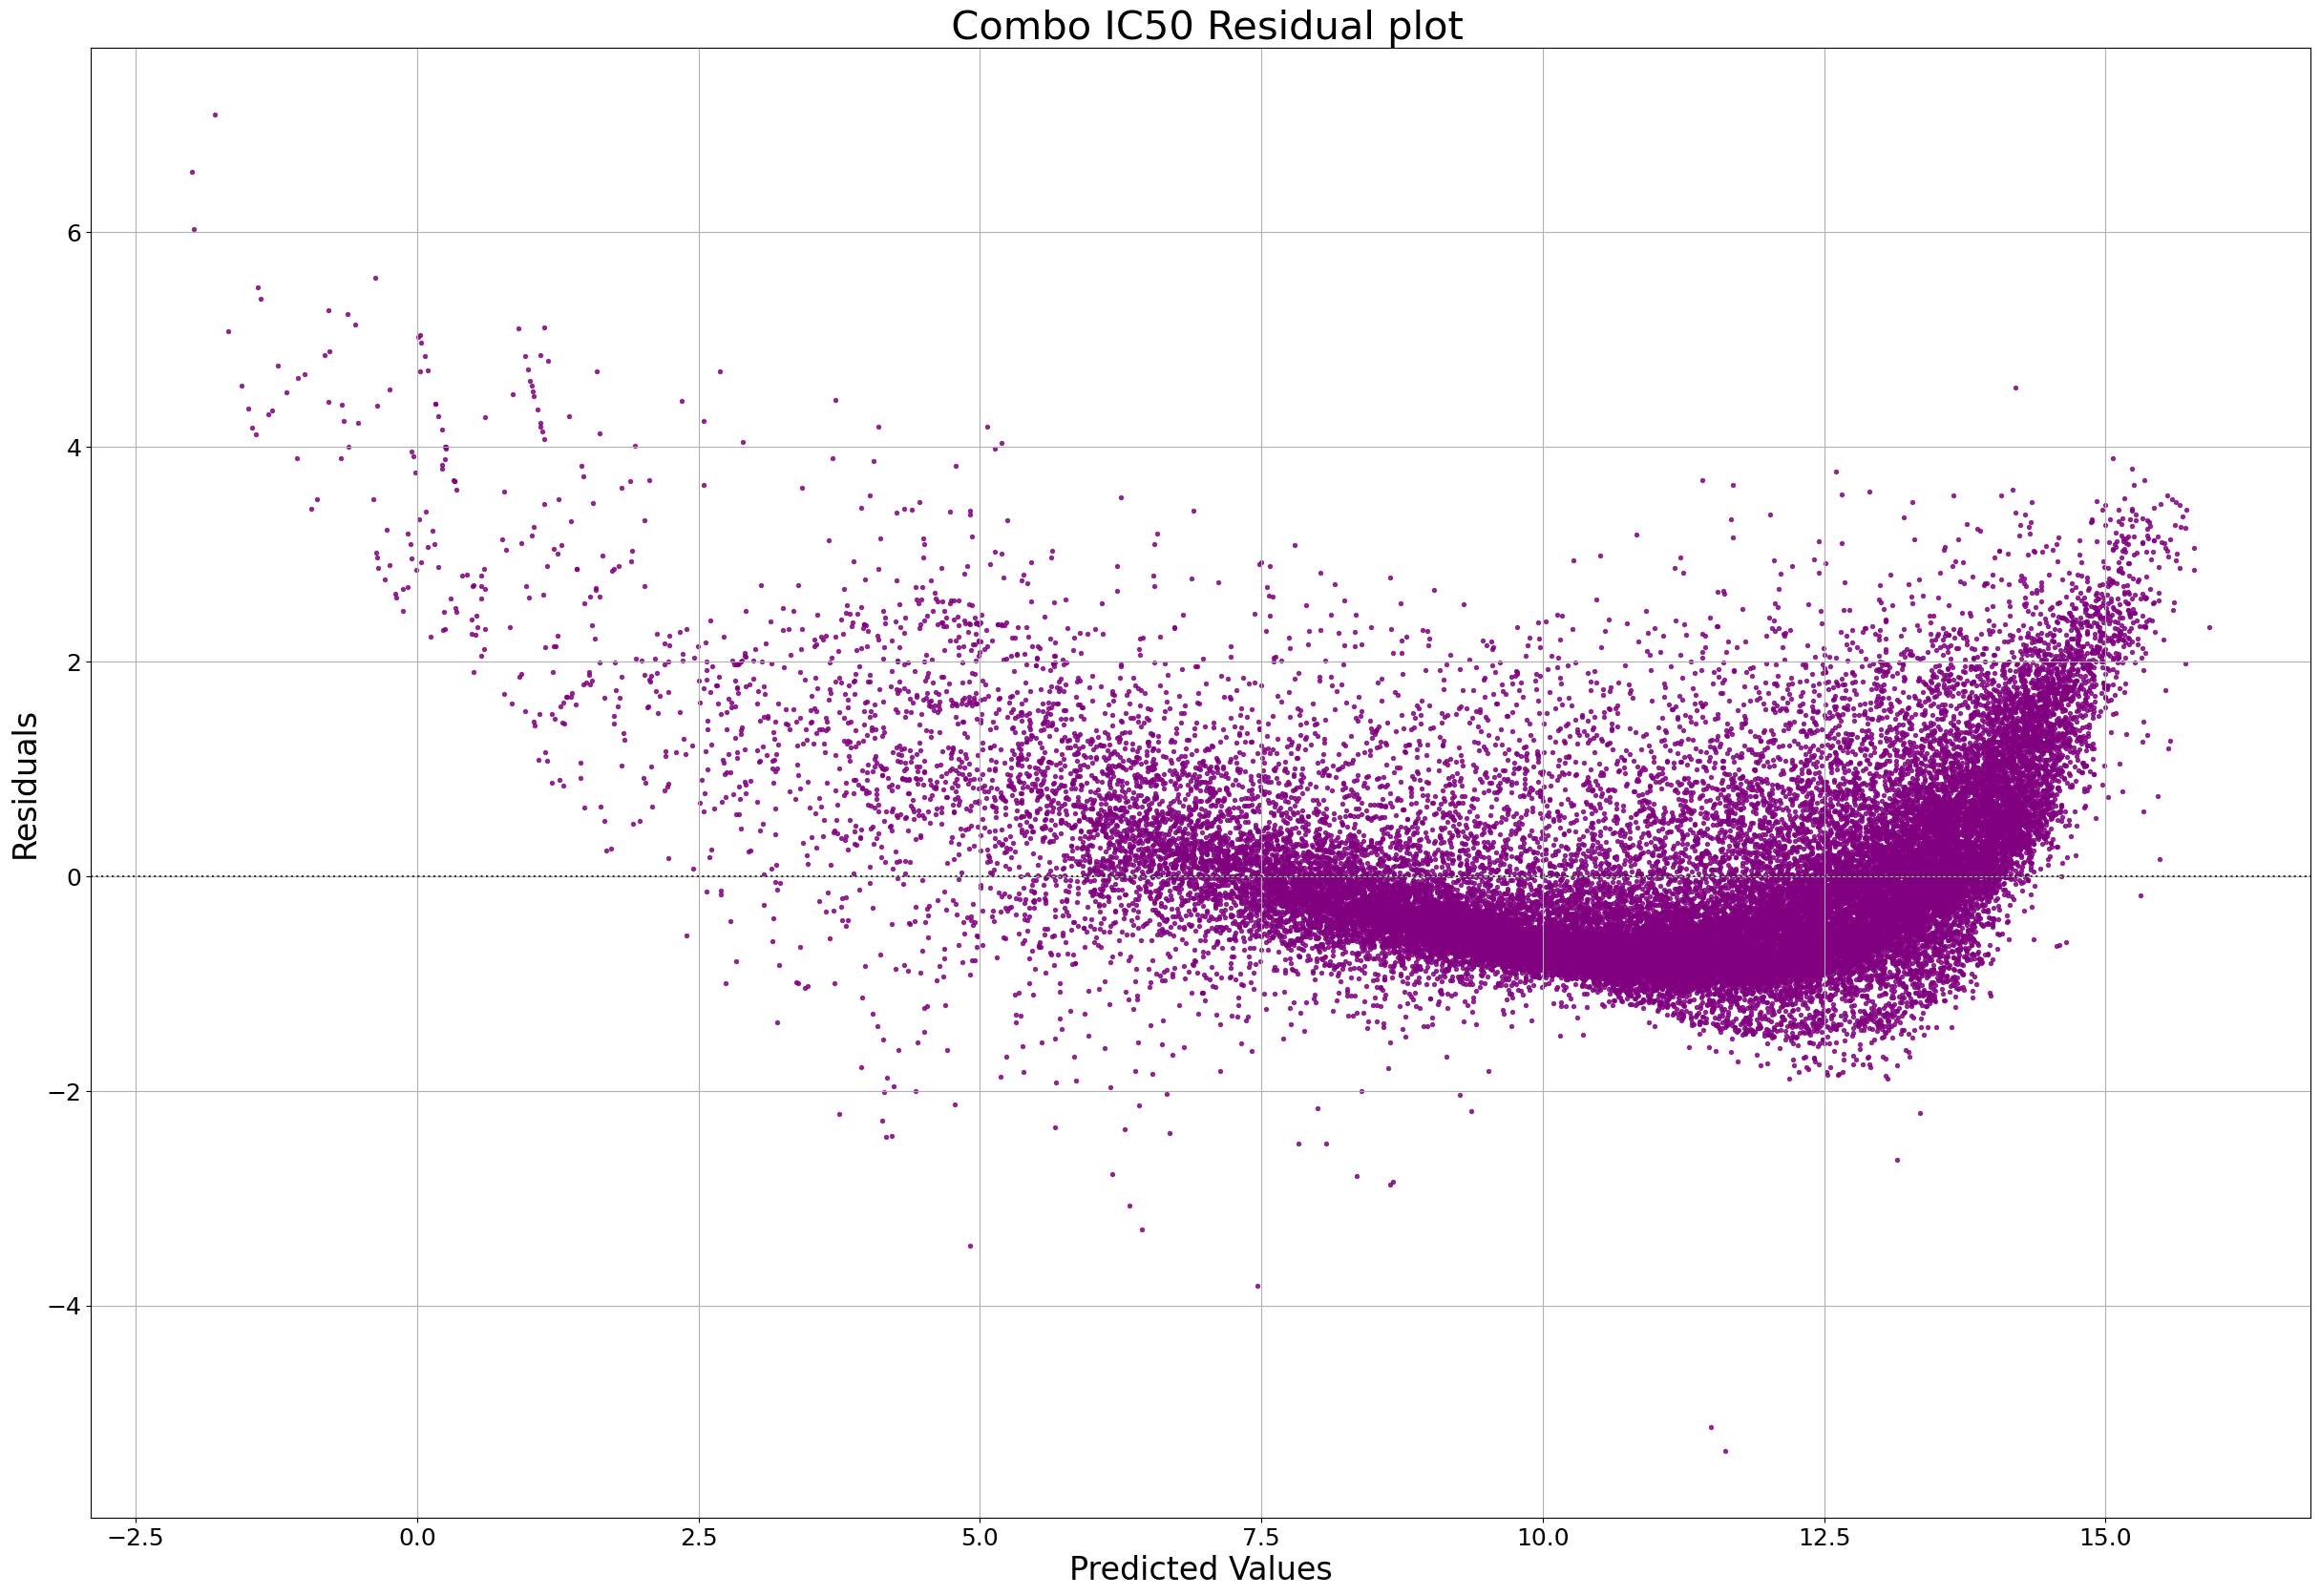

In [60]:
# residual plot

y_test = np.array(y_test)
y_test = np.ravel(y_test)
test_pred
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Calculate residuals
residuals = y_test - test_pred
residuals = pd.DataFrame(residuals)
residuals = np.ravel(residuals)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and residuals 'residuals'
# Replace 'y_pred' and 'residuals' with your actual data

# Check the dimensions of 'y_pred' and 'residuals'
print(len(test_pred), len(residuals))

# Create a residual plot
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Specify the color for the residual points (e.g., 'lightcoral')
sns.residplot(x=test_pred, y=residuals, scatter_kws={'s': 8, 'color': 'purple'})

plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Add labels and a title with increased font size
plt.xlabel("Predicted Values", fontsize=24)  # Adjust fontsize as needed
plt.ylabel("Residuals", fontsize=24)  # Adjust fontsize as needed
plt.title(" Combo IC50 Residual plot", fontsize=30)  # Adjust fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


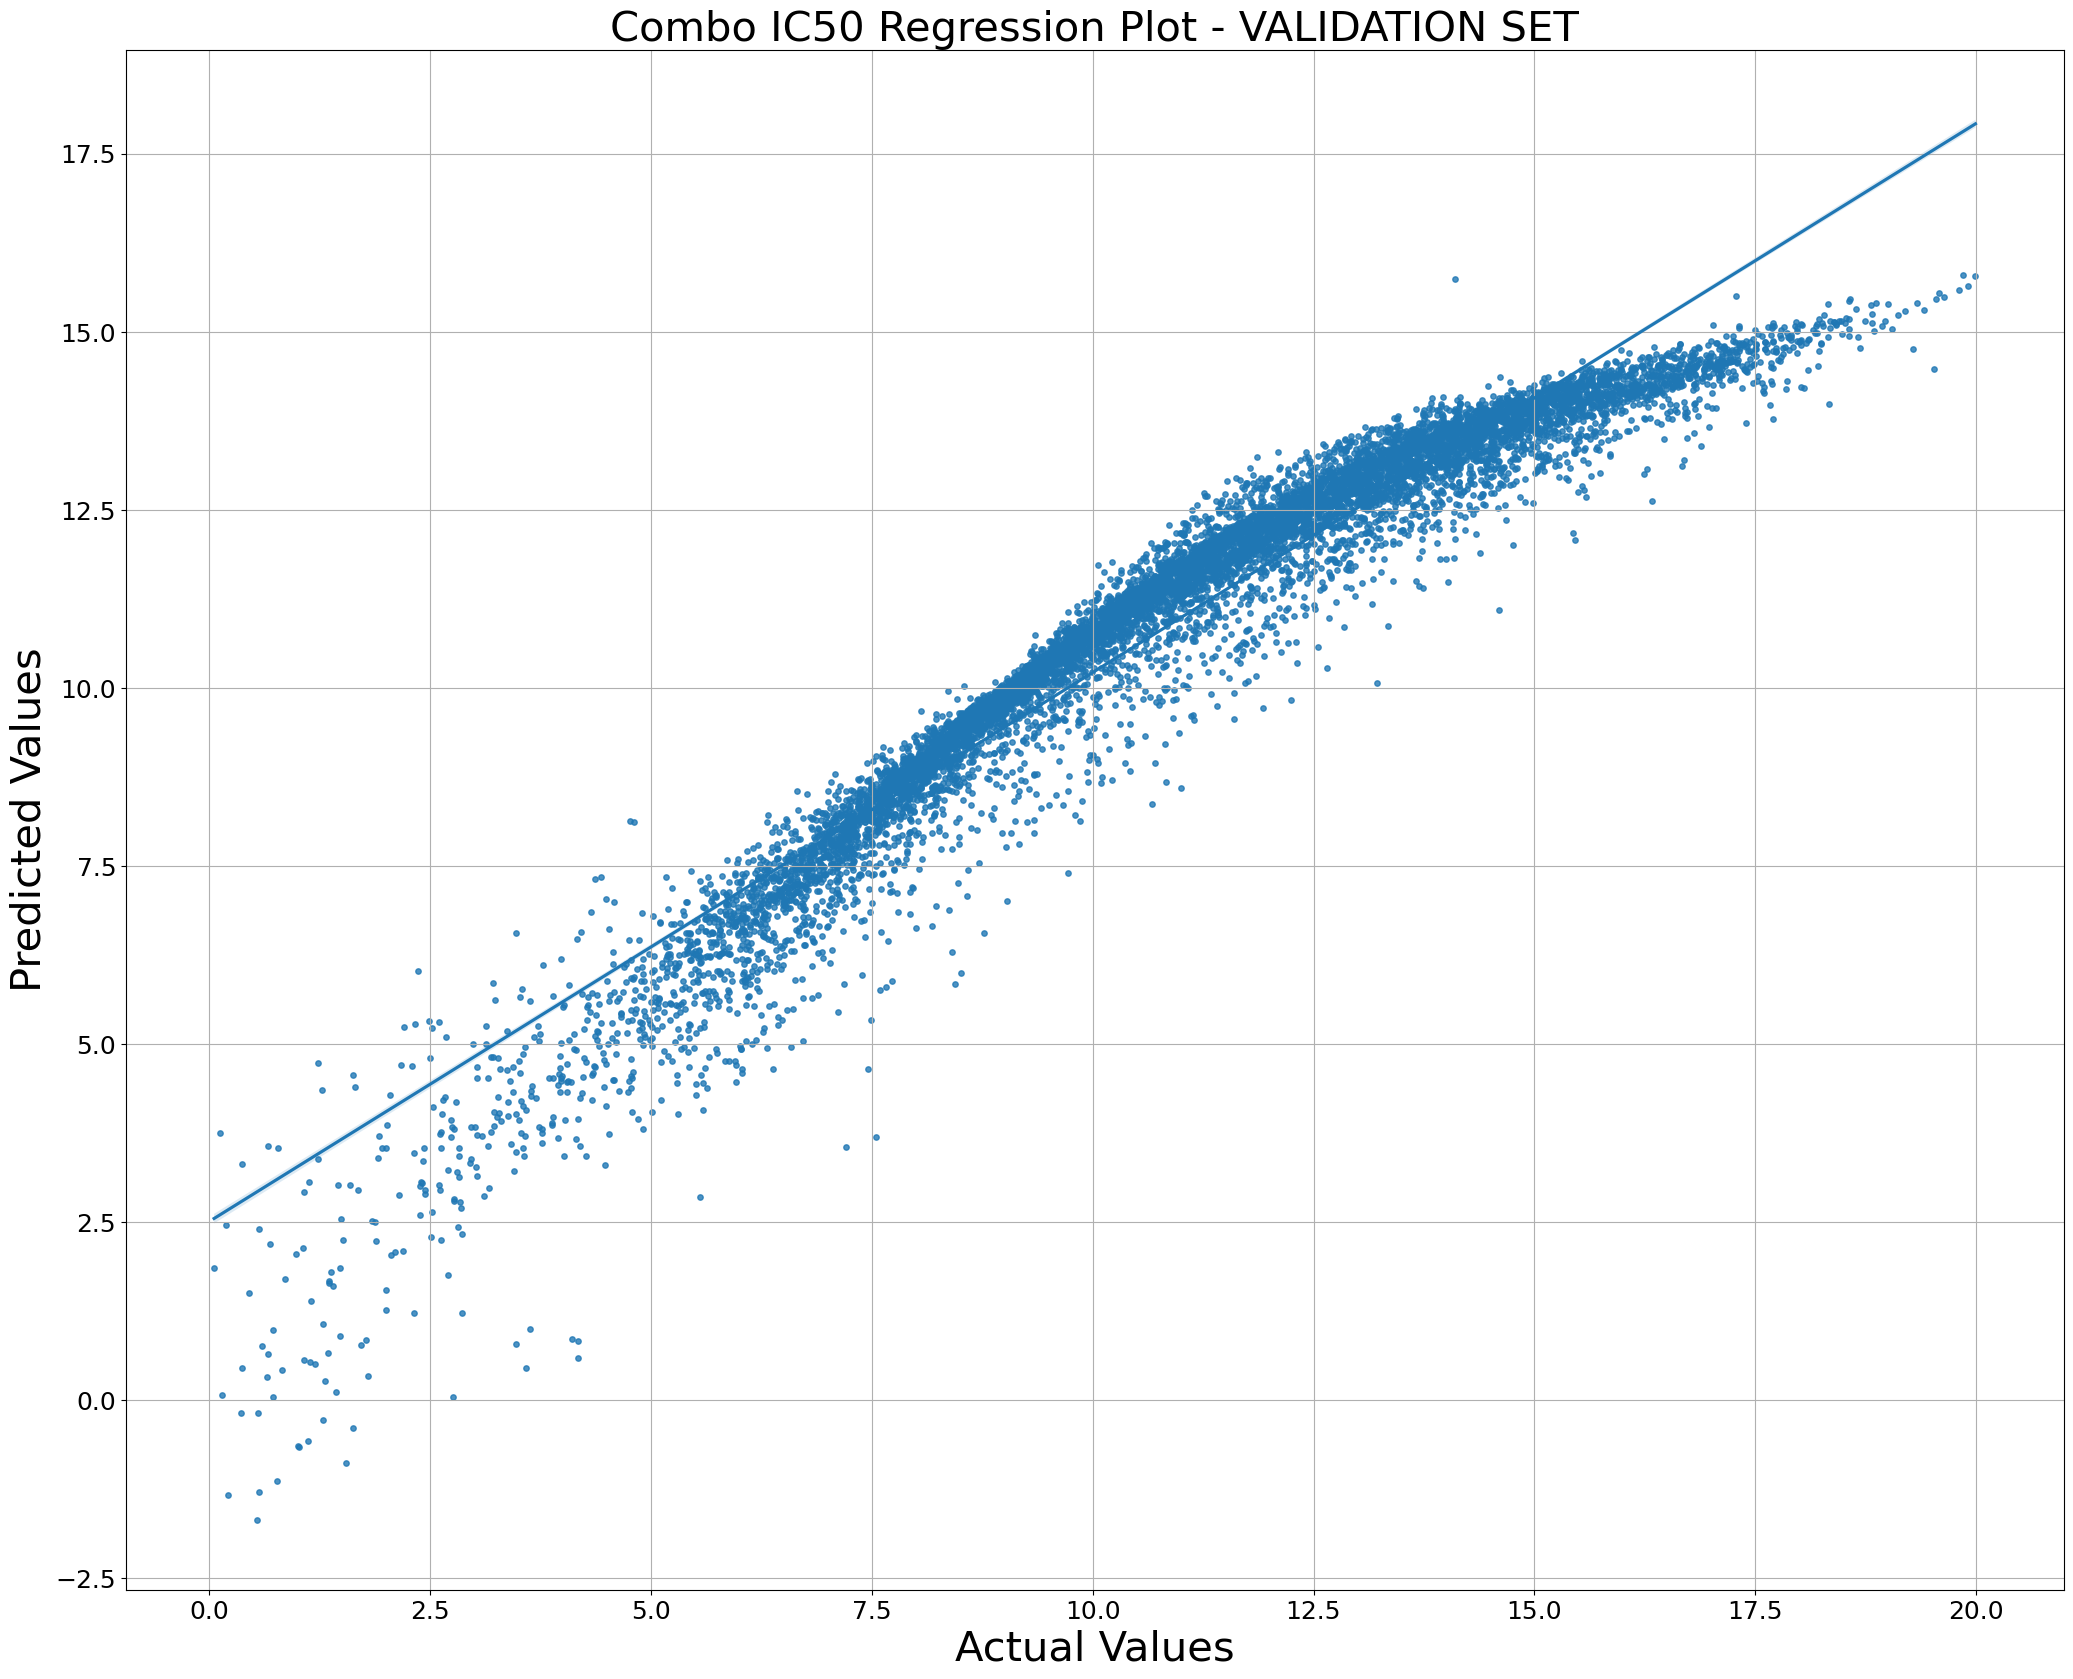

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Create a scatterplot with regression line and confidence interval
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.regplot(x=y_val, y=val_pred, scatter_kws={'s': 15}, ci=95)

# Add labels and a title
plt.xlabel("Actual Values", fontsize=30)
plt.ylabel("Predicted Values", fontsize=30)
plt.title("Combo IC50 Regression Plot - VALIDATION SET", fontsize=30)
plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

10000 10000


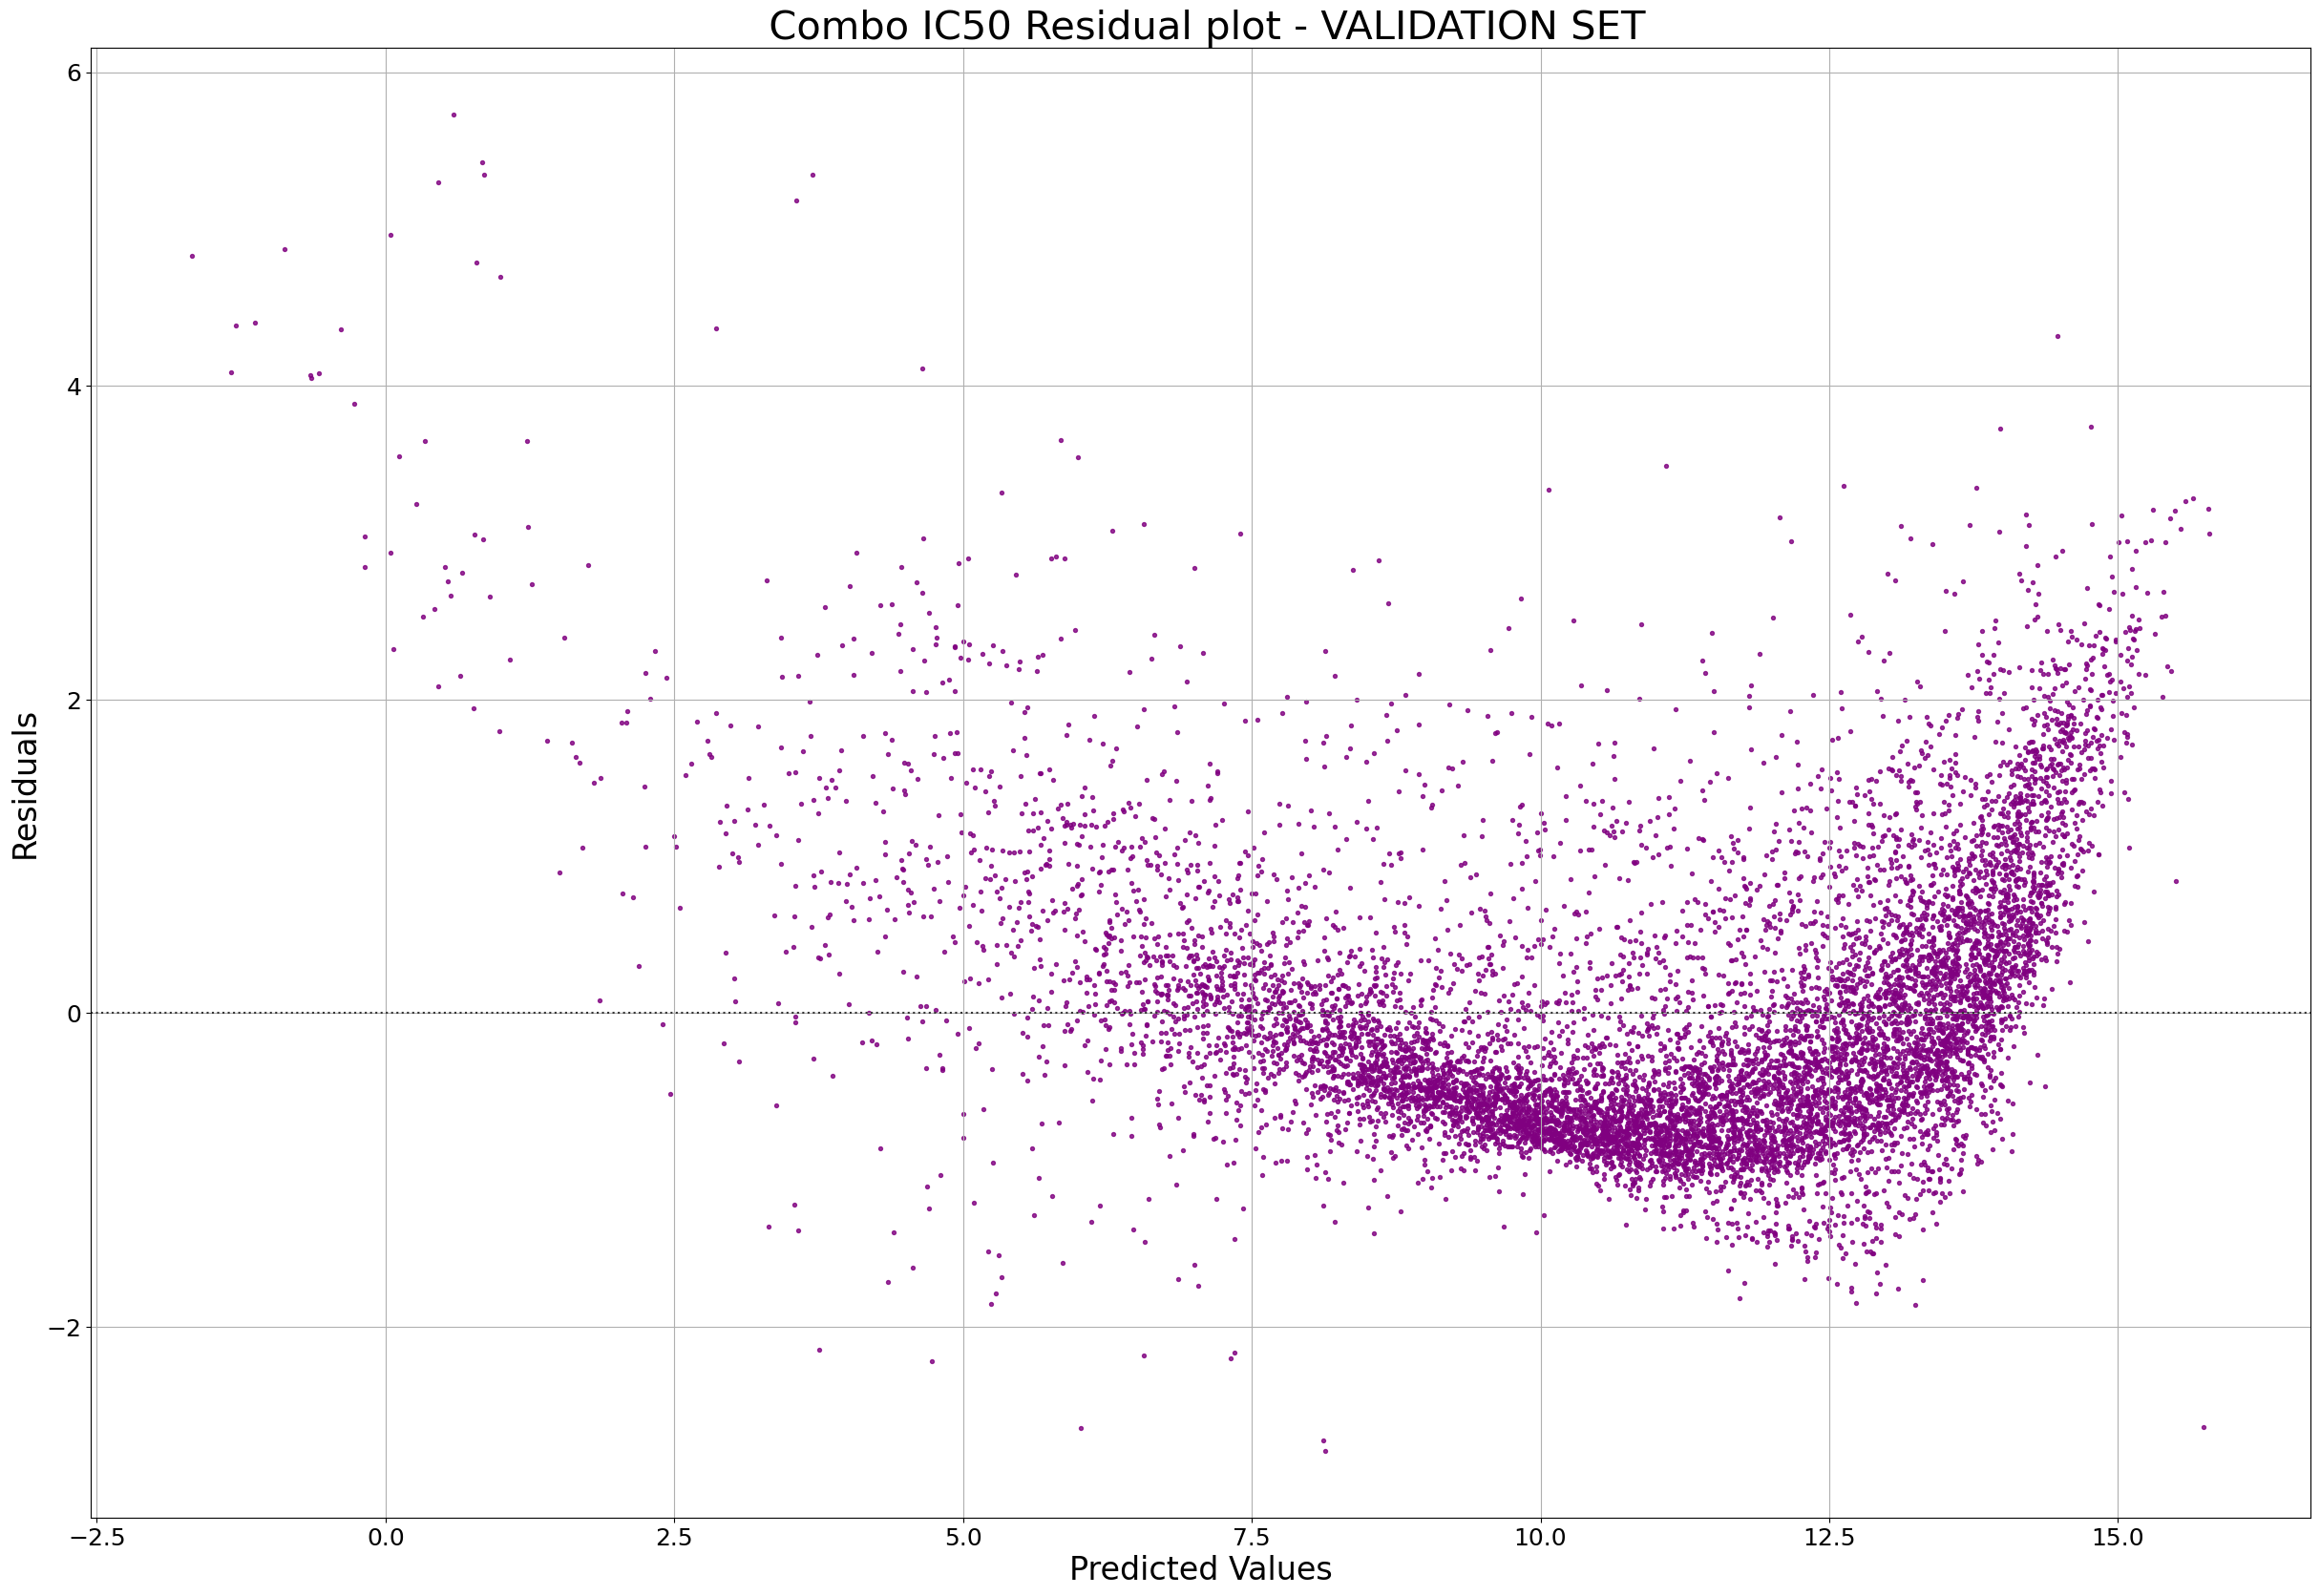

In [62]:
# residual plot

y_val = np.array(y_val)
y_val = np.ravel(y_val)
val_pred
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Calculate residuals
residuals = y_val - val_pred
residuals = pd.DataFrame(residuals)
residuals = np.ravel(residuals)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and residuals 'residuals'
# Replace 'y_pred' and 'residuals' with your actual data

# Check the dimensions of 'y_pred' and 'residuals'
print(len(val_pred), len(residuals))

# Create a residual plot
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Specify the color for the residual points (e.g., 'lightcoral')
sns.residplot(x=val_pred, y=residuals, scatter_kws={'s': 8, 'color': 'purple'})

plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Add labels and a title with increased font size
plt.xlabel("Predicted Values", fontsize=24)  # Adjust fontsize as needed
plt.ylabel("Residuals", fontsize=24)  # Adjust fontsize as needed
plt.title(" Combo IC50 Residual plot - VALIDATION SET", fontsize=30)  # Adjust fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()
